# Author : Mayank Mardiya

# GRIP@The Sparks Foundation

## Task 2: Prediction using Unsupervised ML

    In this Task we will predict the optimum number of clusters and represent it visually From the given ‘Iris’ dataset.
    Data can be found at https://bit.ly/3kXTdox.

### Step 1 - Importing Libraries

In [4]:
# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2 - Importing data

In [7]:
# Reading data from remote link
data_set = pd.read_csv("iris.csv")
print("Data import successful")

Data import successful


In [8]:
# See the first 5 rows
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Looking at the data, we can see that there is column 'Id' which is not necessary. So we are removing it using del method.

In [9]:
# removing a column
del data_set['Id']

In [10]:
# shape of the data
data_set.shape

(150, 5)

Looking at the shape, we can see tha there are 150 rows and 5 columns.

In [11]:
#checking for null values
data_set.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values and hence data cleaning is not required

In [12]:
# looking at the statistical measures 
data_set.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Step 3 - Input data Visualization

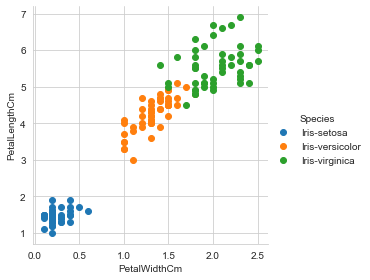

In [13]:
## Scatter plot between Petal width and petal length

sns.set_style("whitegrid")
sns.FacetGrid(data_set, hue="Species", height=4).map(plt.scatter, "PetalWidthCm", "PetalLengthCm").add_legend()
plt.show()

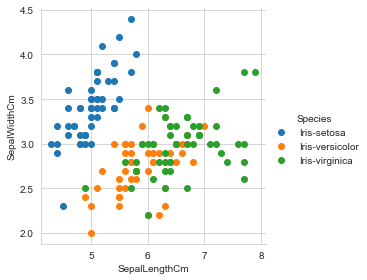

In [14]:
## Scatter plot between Sepal width and Sepal length
sns.set_style("whitegrid")
sns.FacetGrid(data_set, hue="Species", height=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show()

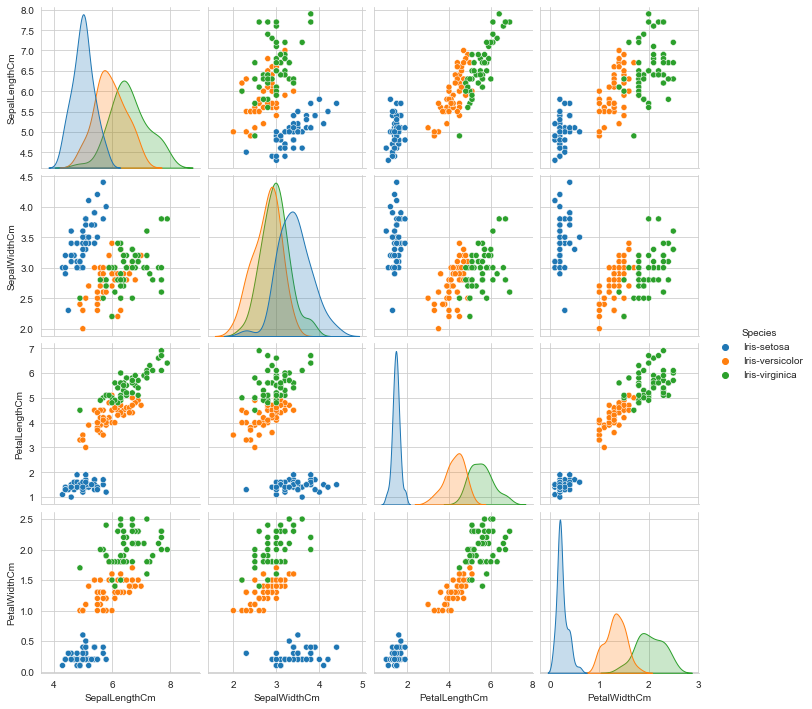

In [15]:
# Paired plot using seaborn

plt.close()
sns.set_style("whitegrid");
sns.pairplot(data_set, hue="Species", diag_kind="kde");
plt.show()

Observation:

From the above pair plot we can see that,

    1.Petal width and Petal Length of setosa species is easily separable.
    2.Sepal width and Sepal Length of all three species is overlapped.
    3.Petal length and petal width are more useful features to predict species type.

<AxesSubplot:>

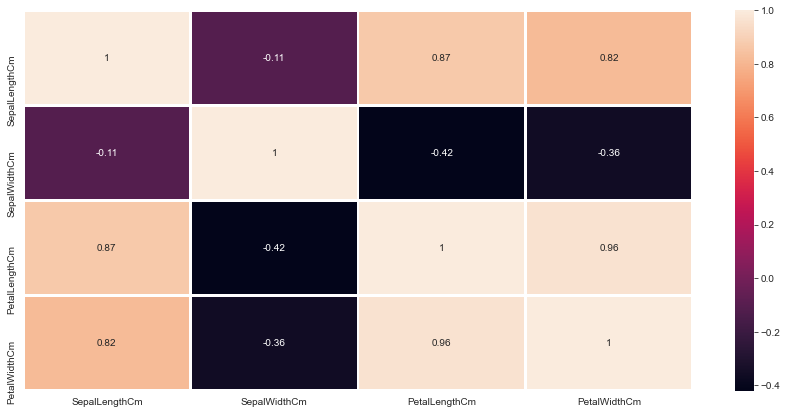

In [16]:
# Plotting on Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(data_set.corr(), annot=True, linewidth=2)

From the above heat map we can see that Sepal width and sepal length is slightly correlated with each other.

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

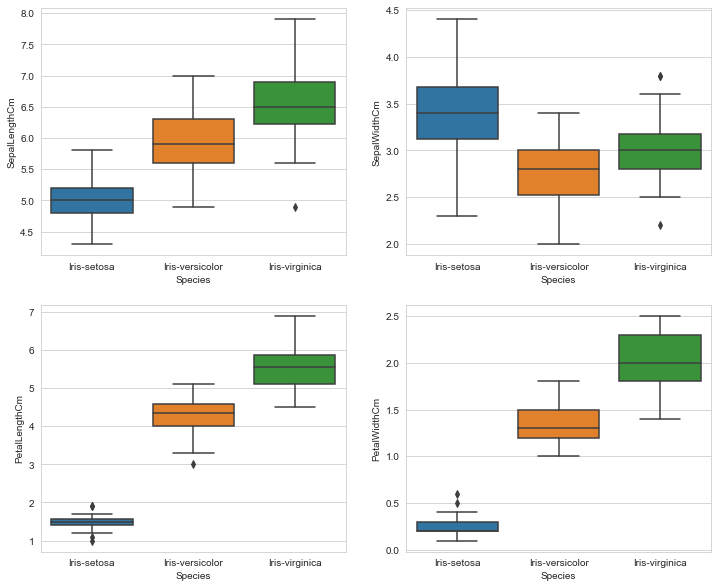

In [17]:
## Box plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'Species',y= 'SepalLengthCm',data=data_set)
plt.subplot(2,2,2)
sns.boxplot(x= 'Species',y= 'SepalWidthCm' ,data=data_set)
plt.subplot(2,2,3)
sns.boxplot(x= 'Species' ,y= 'PetalLengthCm',data=data_set)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y= 'PetalWidthCm',data=data_set)

Above boxplot shows the distribution of the input variables and outliers. From the boxplot we can see that iris-setosa is negatively skewed and have few outliers and other species are normally distributed.

### Step 4 - Predicting optimal number of clusters

There are different methods to predict optimal number of clusters. We are using KMeans clustering in this task. This is a partitioning clustering which requires the user to specify the number of clusters to be generated.

Here we are implementing K-means clustering:

    1.Choosimg number of clusters k
    2.Select random points(k) as centroids
    3.Assigning all the points to the closest cluster centroid.
    4.Recompute the centroids of newly formed clusters. Steps 3 and 4 are repeated

In [18]:
# Finding the optimum number of clusters for k-means classification

x = data_set.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Elbow method to determine the optimal number of clusters:

Implementing elbow method:

    1.For each clusters k, calculate the total WSS(within-cluster sum of square)
    2.Plotting the curve according to the number of clusters k.
    3.The point where the line bend in the plot is considered as appropriate number of clusters.

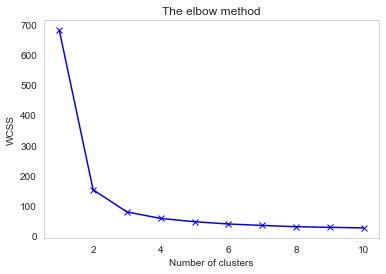

In [19]:
#elbow method
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.grid()
plt.show()

**From the above Elbow method we can see that the line bend at the point 3. Therefore, we consider 3 as number of clusters.**

### Step 5 - Creating the kmeans classifier

In [20]:
# Fitting the K-means model

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Step 6 - Visualizing the clusters

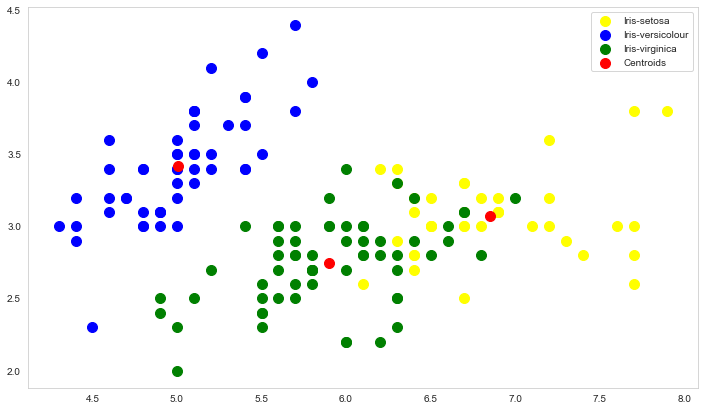

In [21]:
# Visualising the clusters - On 2D plane
plt.figure(figsize=(12,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

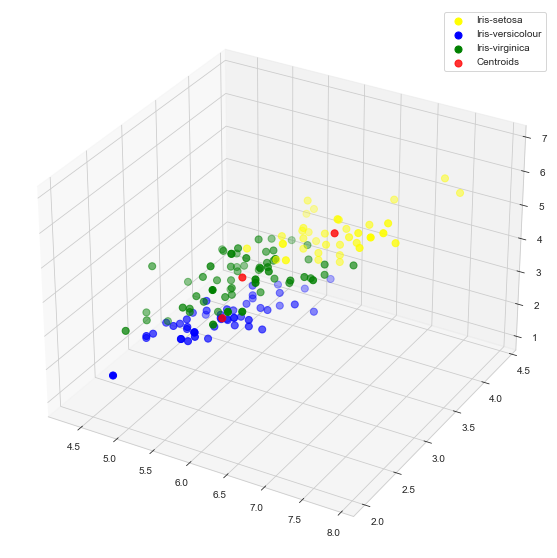

In [22]:
# Visualising the clusters - On 3D plane
plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
ax.scatter3D(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 50, c = "yellow", label = 'Iris-setosa')
ax.scatter3D(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 50, c = 'blue', label = 'Iris-versicolour')
ax.scatter3D(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 50, c = 'red', label = 'Centroids', alpha = 0.8)
plt.legend()
plt.show()